# First Simple Model

This notebooks documents the CRISP-DM steps taken so far, for the first simple linear regression model of King County housing prices in 2018

In [1]:
from src.data import data_collection, sql_utils
from src.modeling import modeling

import psycopg2

## Business Understanding

To a certain extent, this is an artificial setup, so the business understanding is somewhat secondary to the data understanding.  Based on initial data understanding, this project emphasizes which factors could "improve" (increase) a home's sale price, with a target audience of people who are looking to build or renovate a home with the highest possible value.

To be able to build a model that will provide those recommendations, first we need a valid linear regression model that does not violate any assumptions.  Of the original claims, these seem most viable to address while also making a valid model:

1. Higher square footage increases home sale price
3. Having a beachfront or lakefront increases home sale price

Then the next steps will be figuring out which third claim to address, as well as any additional relevant questions.

## Data Understanding

The [data](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) used for this project comes from King County, Washington.  I used Python and SQL scripts to download this data and convert each of the following CSV files into SQL tables within a database called `housing_data`:

| King County Zip File Name | PostgreSQL Table Name |
| ------------------------- | --------------------- |
| Real Property Sales       | sales                 |
| Residential Building      | buildings             |
| Parcel                    | parcels               |

<table>
    <tr>
        <th>Sales Table</th>
        <th>Buildings Table</th>
        <th>Parcels Table</th>
    </tr>
    <tr>
<td>
            
|       Column       |     Type      |
| ------------------ | ------------- |
| excisetaxnbr       | integer       |
| major              | character(6)  |
| minor              | character(4)  |
| documentdate       | date          |
| saleprice          | integer       |
| recordingnbr       | character(14) |
| volume             | character(3)  |
| page               | character(3)  |
| platnbr            | character(6)  |
| plattype           | character(1)  |
| platlot            | character(14) |
| platblock          | character(7)  |
| sellername         | text          |
| buyername          | text          |
| propertytype       | integer       |
| principaluse       | integer       |
| saleinstrument     | integer       |
| afforestland       | character(1)  |
| afcurrentuseland   | character(1)  |
| afnonprofituse     | character(1)  |
| afhistoricproperty | character(1)  |
| salereason         | integer       |
| propertyclass      | integer       |
| salewarning        | text          |

</td>
<td>

|       Column       |     Type      |
| ------------------ | ------------- |
| major              | character(6)  |
| minor              | character(4)  |
| bldgnbr            | integer       |
| nbrlivingunits     | integer       |
| address            | text          |
| buildingnumber     | character(5)  |
| fraction           | character(3)  |
| directionprefix    | character(2)  |
| streetname         | character(25) |
| streettype         | character(6)  |
| directionsuffix    | character(2)  |
| zipcode            | character(10) |
| stories            | real          |
| bldggrade          | integer       |
| bldggradevar       | integer       |
| sqft1stfloor       | integer       |
| sqfthalffloor      | integer       |
| sqft2ndfloor       | integer       |
| sqftupperfloor     | integer       |
| sqftunfinfull      | integer       |
| sqftunfinhalf      | integer       |
| sqfttotliving      | integer       |
| sqfttotbasement    | integer       |
| sqftfinbasement    | integer       |
| finbasementgrade   | integer       |
| sqftgaragebasement | integer       |
| sqftgarageattached | integer       |
| daylightbasement   | character(1)  |
| sqftopenporch      | integer       |
| sqftenclosedporch  | integer       |
| sqftdeck           | integer       |
| heatsystem         | integer       |
| heatsource         | integer       |
| brickstone         | integer       |
| viewutilization    | character(1)  |
| bedrooms           | integer       |
| bathhalfcount      | integer       |
| bath3qtrcount      | integer       |
| bathfullcount      | integer       |
| fpsinglestory      | integer       |
| fpmultistory       | integer       |
| fpfreestanding     | integer       |
| fpadditional       | integer       |
| yrbuilt            | integer       |
| yrrenovated        | integer       |
| pcntcomplete       | integer       |
| obsolescence       | integer       |
| pcntnetcondition   | integer       |
| condition          | integer       |
| addnlcost          | integer       |

</td>
<td>

|         Column         |     Type      |
| ---------------------- | ------------- |
| major                  | character(6)  |
| minor                  | character(4)  |
| propname               | character(80) |
| platname               | character(50) |
| platlot                | character(14) |
| platblock              | character(7)  |
| range                  | integer       |
| township               | integer       |
| section                | integer       |
| quartersection         | character(2)  |
| proptype               | character(1)  |
| area                   | character(3)  |
| subarea                | character(3)  |
| specarea               | character(3)  |
| specsubarea            | character(3)  |
| districtname           | character(80) |
| levycode               | character(4)  |
| currentzoning          | character(50) |
| hbuasifvacant          | integer       |
| hbuasimproved          | integer       |
| presentuse             | integer       |
| sqftlot                | integer       |
| watersystem            | integer       |
| sewersystem            | integer       |
| access                 | integer       |
| topography             | integer       |
| streetsurface          | integer       |
| restrictiveszshape     | integer       |
| inadequateparking      | integer       |
| pcntunusable           | integer       |
| unbuildable            | character(5)  |
| mtrainier              | integer       |
| olympics               | integer       |
| cascades               | integer       |
| territorial            | integer       |
| seattleskyline         | integer       |
| pugetsound             | integer       |
| lakewashington         | integer       |
| lakesammamish          | integer       |
| smalllakerivercreek    | integer       |
| otherview              | integer       |
| wfntlocation           | integer       |
| wfntfootage            | integer       |
| wfntbank               | integer       |
| wfntpoorquality        | integer       |
| wfntrestrictedaccess   | integer       |
| wfntaccessrights       | character(1)  |
| wfntproximityinfluence | character(1)  |
| tidelandshoreland      | integer       |
| lotdepthfactor         | integer       |
| trafficnoise           | integer       |
| airportnoise           | integer       |
| powerlines             | character(1)  |
| othernuisances         | character(1)  |
| nbrbldgsites           | integer       |
| contamination          | integer       |
| dnrlease               | character(1)  |
| adjacentgolffairway    | character(1)  |
| adjacentgreenbelt      | character(1)  |
| historicsite           | integer       |
| currentusedesignation  | integer       |
| nativegrowthprotesmt   | character(1)  |
| easements              | character(1)  |
| otherdesignation       | character(1)  |
| deedrestrictions       | character(1)  |
| developmentrightspurch | character(1)  |
| coalminehazard         | character(1)  |
| criticaldrainage       | character(1)  |
| erosionhazard          | character(1)  |
| landfillbuffer         | character(1)  |
| hundredyrfloodplain    | character(1)  |
| seismichazard          | character(1)  |
| landslidehazard        | character(1)  |
| steepslopehazard       | character(1)  |
| stream                 | character(1)  |
| wetland                | character(1)  |
| speciesofconcern       | character(1)  |
| sensitiveareatract     | character(1)  |
| waterproblems          | character(1)  |
| transpconcurrency      | character(1)  |
| otherproblems          | character(1)  |

</td>
    </tr>
</table>

To download all data and load it into PostgreSQL, run:

In [2]:
data_collection.download_data_and_load_into_sql()

The raw count of home sales is:

In [3]:
conn = psycopg2.connect(dbname="housing_data")

In [4]:
sql_utils.return_result_of_sql_script(conn, "10_sales_in_2018.sql")

,count
0,61053


If all home sales with a price of 0 are removed, the count becomes:

In [5]:
sql_utils.return_result_of_sql_script(conn, "11_sales_price_above_zero.sql")

,count
0,42524


Finally, ensuring that the city also has building and parcel data for each of the sales, the final count is:

In [6]:
sql_utils.return_result_of_sql_script(conn, "12_sales_with_building_and_parcel.sql")

,count
0,30272


It appears that about half of the data from 2018 is invalid in some way.  A potential future task would be determining whether any of that data is recoverable, or whether there are systematic ways that data is missing, but for now let's assume that these 30,272 home sales are the best data we're going to get.

In [7]:
conn.close()

## Data Preparation

No steps were taken to clean the data before inserting it into PostgreSQL, so data preparation must come in the form of SQL queries, followed by Pandas DataFrame manipulation

The following function creates a DataFrame representing the sales data with only five columns (to be expanded upon later):

In [8]:
sales_df = sql_utils.create_sales_df()
sales_df

,pin,saleprice,documentdate,wfntlocation,sqfttotliving
0,2287300010,298633,2018-01-01,False,1810
1,8732160190,355000,2018-01-01,False,1580
2,8695200067,275000,2018-01-01,False,1250
3,8005100850,177000,2018-01-02,False,800
4,0255370370,453999,2018-01-02,False,2580
...,...,...,...,...,...
30267,8946720180,385000,2018-12-31,False,2130
30268,2126079096,549950,2018-12-31,False,2110
30269,8946760070,949995,2018-12-31,False,3310
30270,0626059283,490000,2018-12-31,False,1910


Three of these columns represent data for modeling (`saleprice`, `wfntlocation`, `sqfttotliving`), and `pin` and `documentdate` are just descriptive labels for now

In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30272 entries, 0 to 30271
Data columns (total 5 columns):
pin              30272 non-null object
saleprice        30272 non-null int64
documentdate     30272 non-null object
wfntlocation     30272 non-null bool
sqfttotliving    30272 non-null int64
dtypes: bool(1), int64(2), object(2)
memory usage: 975.7+ KB


In [10]:
sales_df.describe()

,saleprice,sqfttotliving
count,3.027200e+04,30272.000000
mean,8.241142e+05,2176.689383
std,7.799482e+05,1007.660493
min,1.000000e+00,3.000000
25%,4.408750e+05,1450.000000
50%,6.600000e+05,1980.000000
75%,9.361250e+05,2720.000000
max,2.675000e+07,14980.000000


In [11]:
sales_df["wfntlocation"].value_counts()

False    29727
True       545
Name: wfntlocation, dtype: int64

Code within the `modeling` module extracts the relevant features, and converts them from human-readable (e.g. True or False) into the numeric data types required for linear regression (e.g. 1 or 0)

## Modeling

Thus far the linear regression model is just an OLS model with `saleprice` as the target and `wfntlocation` and `sqfttotliving` as the features, without any scaling or elimination of outliers.

## Evaluation

The current model has an R<sup>2</sup> of 0.281, meaning the features explain 28.1% of the variance in the target.

To summarize the findings related to the stakeholder claims:

1. Higher **square footage** increases home sale price
    - Square footage is statistically significant (p < 0.001)
    - Our model indicates that home prices increase by about \\$382 for each additional square foot of total living space

3. Having a **beachfront or lakefront** increases home sale price
    - Waterfront property is statistically significant (p < 0.001)
    - Our model indicates that home prices increase by about \\$924,900 when they have waterfront property compared to homes that do not have waterfront property

To summarize the tests of linear regression assumptions:

 - **Linearity:** Violates the assumption
 - **Independence:** Does not violate the assumption
 - **Homoscedasticity:** Violates the assumption
 - **Normality:** Violates the assumption

A full print-out of the model evaluation is as follows:

//anaconda3/envs/mod2-project-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     5928.
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:30:19   Log-Likelihood:            -4.4865e+05
No. Observations:               30272   AIC:                         8.973e+05
Df Residuals:                   30269   BIC:                         8.973e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.468e+04   9047.027     -2.728

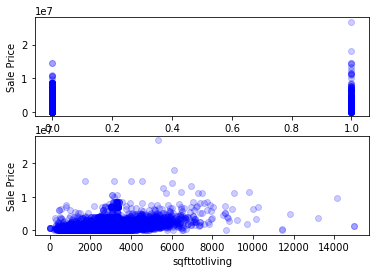

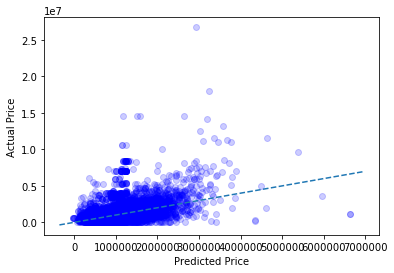

('Violates the linearity assumption according to the rainbow test', 7.380805200946193e-29)

Performing Independence Checks

   VIF Factor       features
0    5.667952          const
1    1.006614   wfntlocation
2    1.006614  sqfttotliving
('No features violate the independence assumption', {})

Performing Homoscedasticity Checks



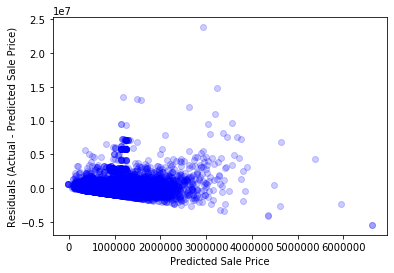

('Violates the homoscedasticity assumption according to the Breusch-Pagan test', 3.915532290240294e-236)

Performing Normality Checks



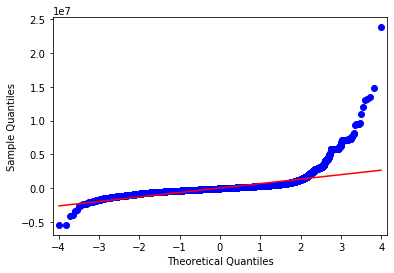

('Violates the normality assumption according to the Kolmogorov-Smirnov test', 0.0)


In [12]:
modeling.build_and_evaluate_model()

## Next Steps

The current model is not meeting the MVP requirements, because it only addresses two of the stakeholder claims, and violates 3 of the 4 assumptions of linear regression models.

Some next steps to improve the model are:

 - Add more features (while ensuring they are independent)
 - Try transforming target and/or features
 - Systematically remove outliers